In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [7]:
print('First five rows of data')
df.head()

First five rows of data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
print('check missing values \n')
df.isnull().sum()

check missing values 



age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
print('Describing the data')
df.describe()

Describing the data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


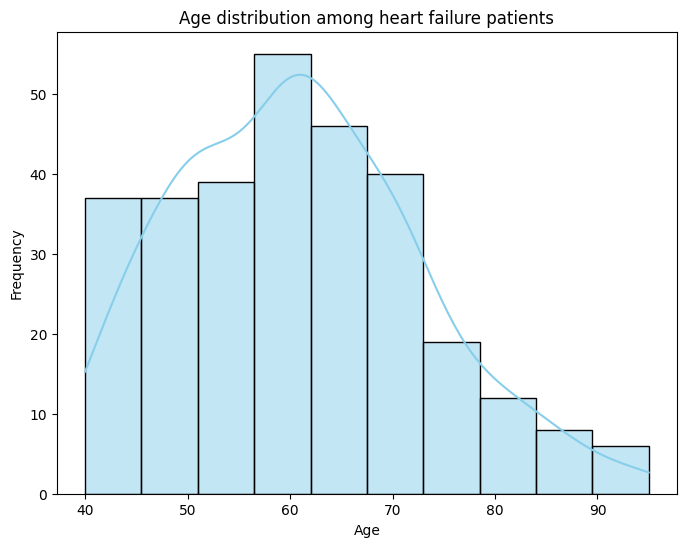

In [16]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x = 'age', kde = True, bins = 10,color = 'skyblue' )
plt.title('Age distribution among heart failure patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

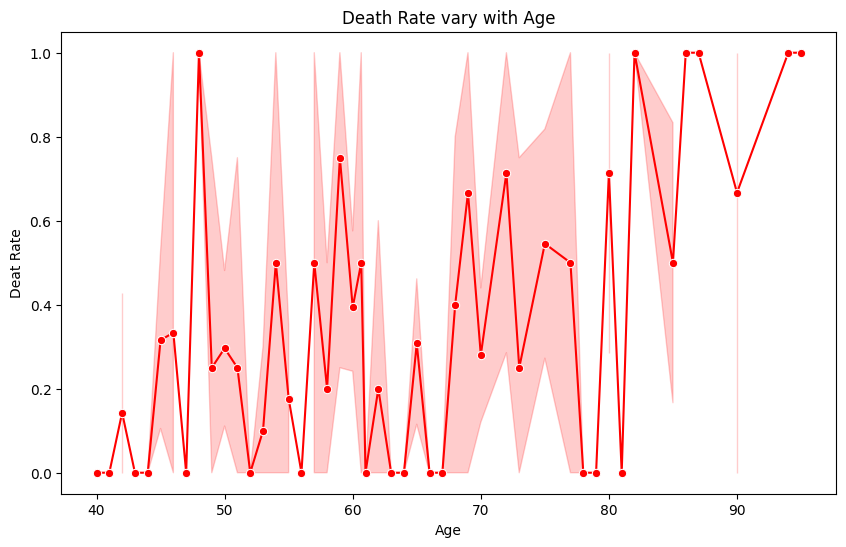

In [22]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df, x = 'age',y='DEATH_EVENT', marker = 'o', color = 'red' )
plt.title('Death Rate vary with Age')
plt.xlabel('Age')
plt.ylabel('Deat Rate')
plt.show()

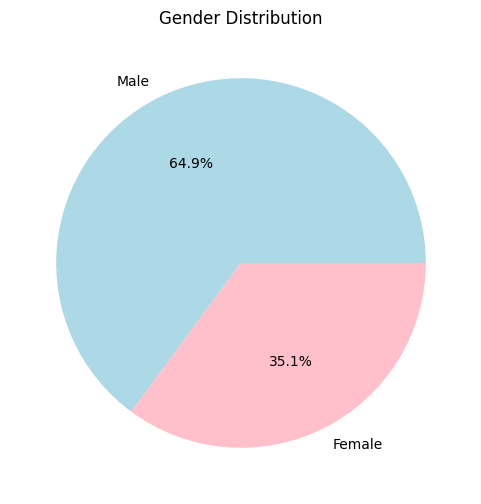

In [27]:
gender_count = df['sex'].value_counts(normalize = True)*100
plt.figure(figsize = (6,6))
plt.pie(gender_count,labels = ['Male','Female'], autopct = '%1.1f%%', colors = ['lightblue','pink'])
plt.title('Gender Distribution')
plt.show()

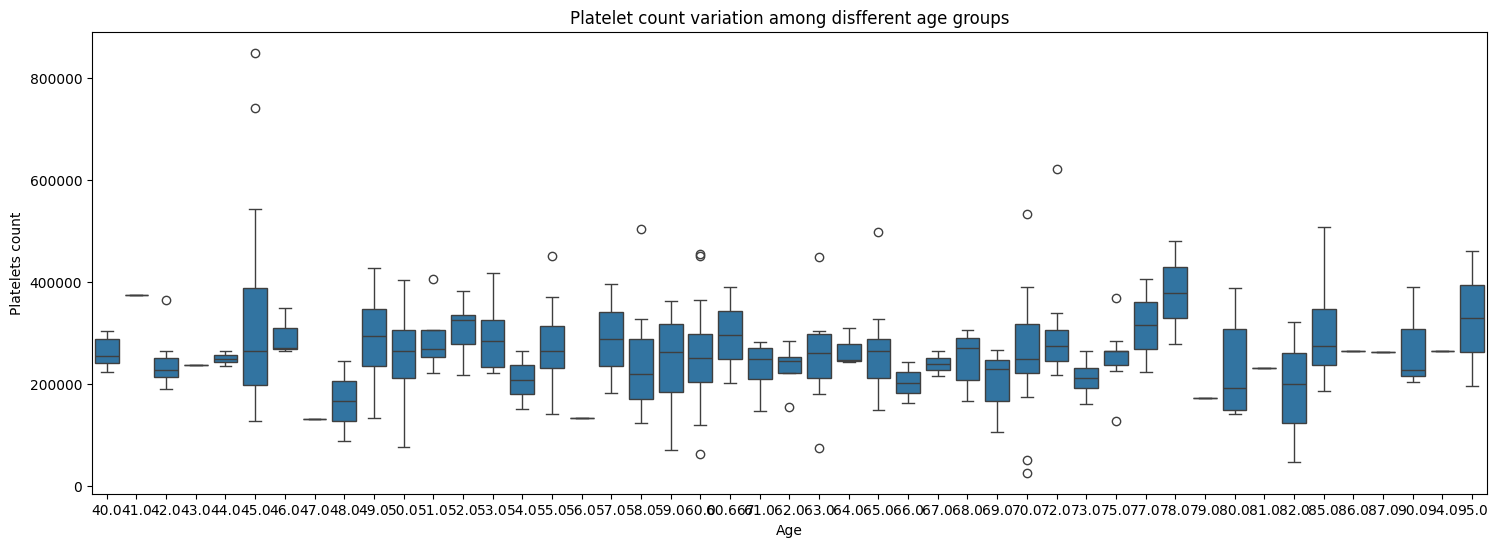

In [35]:
plt.figure(figsize=(18,6))
sns.boxplot(data = df, x='age', y='platelets')
plt.title('Platelet count variation among disfferent age groups')
plt.xlabel('Age')
plt.ylabel('Platelets count')
plt.show()


 correlation between Creatinine and Sodium levels
                  serum_creatinine  serum_sodium
serum_creatinine          1.000000     -0.189095
serum_sodium             -0.189095      1.000000


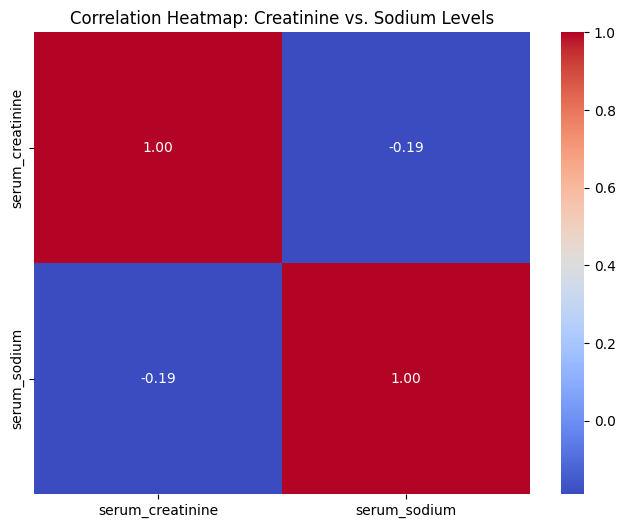

In [39]:
corrleation = df[['serum_creatinine','serum_sodium']].corr()
print('\n correlation between Creatinine and Sodium levels')
print(correlation)

plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',fmt ='.2f')
plt.title('Correlation Heatmap: Creatinine vs. Sodium Levels')
plt.show()

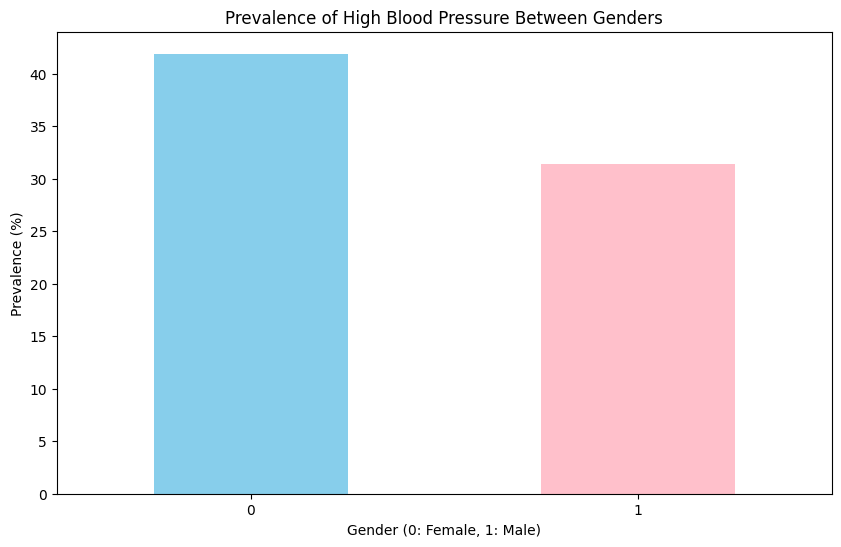

In [40]:
blood_pressure_counts = df.groupby('sex')['high_blood_pressure'].mean()*100
plt.figure(figsize= (10,6))
blood_pressure_counts.plot(kind='bar',color =['skyblue','pink'] )
plt.title('Prevalence of High Blood Pressure Between Genders')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=0)
plt.show()

In [42]:
smoking_counts = df['smoking'].value_counts(normalize=True) * 100
print("\nPercentage of patients who smoke:")
print(smoking_counts)

heart_failure_due_smoking = df.groupby('smoking')['DEATH_EVENT'].mean() * 100
print("\nDeath rate based on smoking habits:")
print(heart_failure_due_smoking)


Percentage of patients who smoke:
0    67.892977
1    32.107023
Name: smoking, dtype: float64

Death rate based on smoking habits:
smoking
0    32.512315
1    31.250000
Name: DEATH_EVENT, dtype: float64


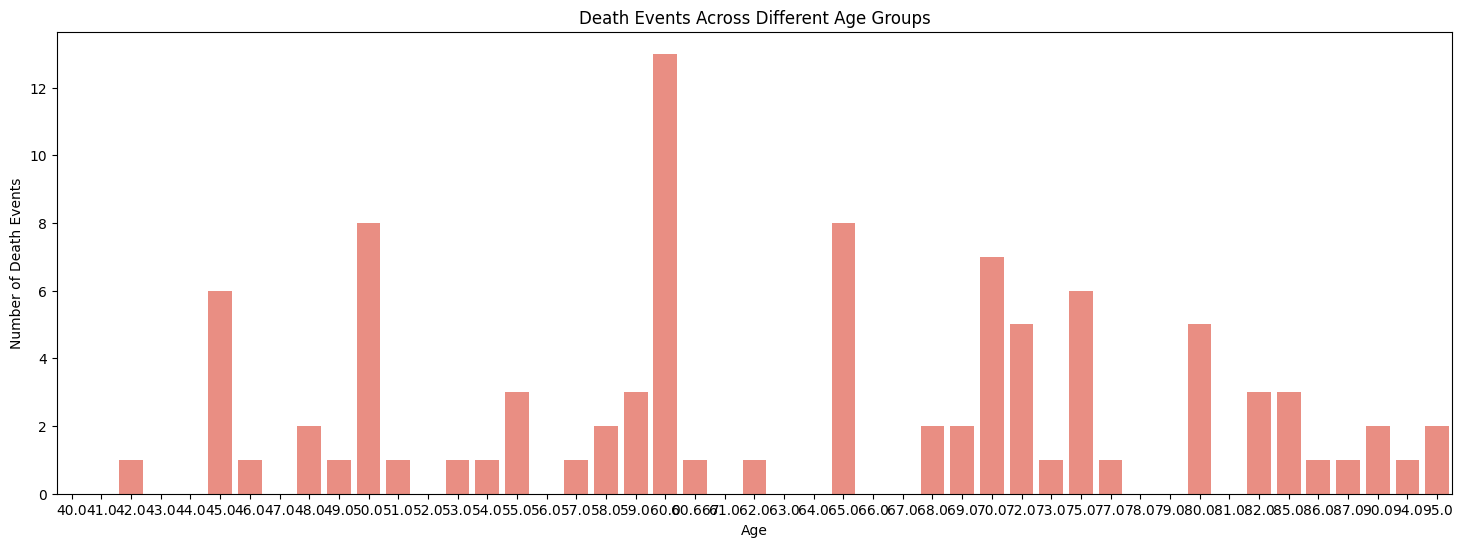

In [44]:
death_by_age = df.groupby('age')['DEATH_EVENT'].sum().reset_index()
plt.figure(figsize=(18, 6))
sns.barplot(data=death_by_age, x='age', y='DEATH_EVENT', color='salmon')
plt.title('Death Events Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Death Events')
plt.show()

In [45]:
ejection_fraction_diabetes = df.groupby('diabetes')['ejection_fraction'].mean().reset_index()
print("\nEjection fraction based on diabetes status:")
print(ejection_fraction_diabetes)


Ejection fraction based on diabetes status:
   diabetes  ejection_fraction
0         0          38.132184
1         1          38.016000


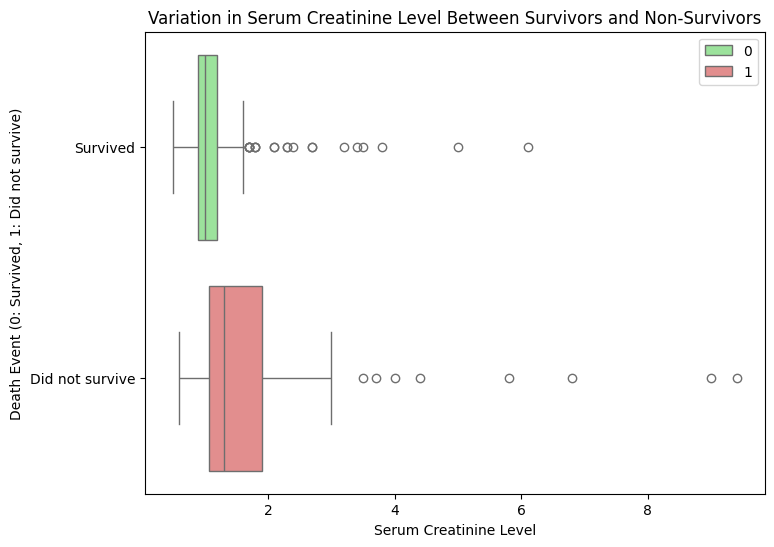

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='serum_creatinine', y='DEATH_EVENT', hue='DEATH_EVENT', palette=['lightgreen', 'lightcoral'], orient='h')
plt.title('Variation in Serum Creatinine Level Between Survivors and Non-Survivors')
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Death Event (0: Survived, 1: Did not survive)')
plt.yticks([0, 1], ['Survived', 'Did not survive'])
plt.legend(title=None)
plt.show()